# The Sparks Foundation

# GRIP October2023

# Author- Swati Kapoor

# Task 03-Exploratory Data Analysis on SampleSuperstore.


In [70]:
#importing all the neccessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
s = r'‪‪C:/Downloads/SampleSuperstore.csv'
s = s.lstrip('\u202a')
data = pd.read_csv(s)
print(data)

           Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code Region  regionvalues         Cate

In [6]:
print("the shape of the data is",data.shape,"\n")
print("the columns in the data are",data.columns,"\n")
print("data types\n",data.dtypes,"\n")
print(data.tail(2)) #gives end 2 rows

the shape of the data is (9994, 15) 

the columns in the data are Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'qty_abv_7',
       'Discount', 'dis_above_4', 'Profit'],
      dtype='object') 

data types
 Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
qty_abv_7          bool
Discount        float64
dis_above_4        bool
Profit          float64
dtype: object 

           Ship Mode   Segment        Country         City       State  \
9992  Standard Class  Consumer  United States   Costa Mesa  California   
9993    Second Class  Consumer  United States  Westminster  California   

      Postal Code Region         Category Sub-Category   Sales  Quantity  \
9992        92627   West 

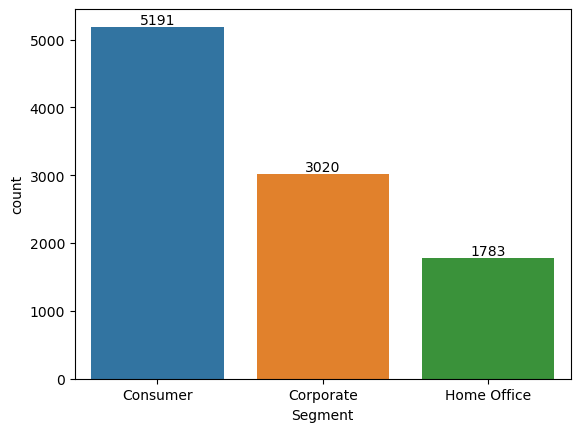

In [17]:
ax = sns.countplot(x = 'Segment',data = data)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Region', ylabel='Segment'>

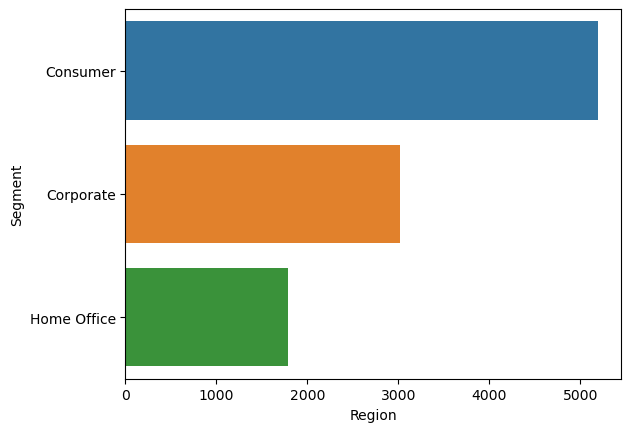

In [21]:
#relationship of segment with region
rel=data.groupby(['Segment'],as_index=False)['Region'].count()
sns.barplot(x='Region',y='Segment',data=rel,orient='h')

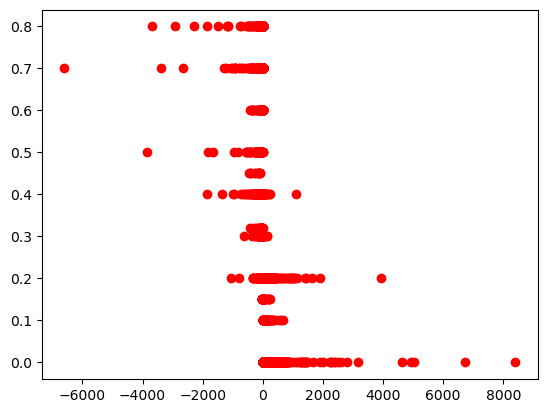

In [39]:
#scatter plot on profit and discount
m=data['Profit']
n=data['Discount']
plt.scatter(m,n,color='red')

<Axes: xlabel='Region', ylabel='dis_above_4'>

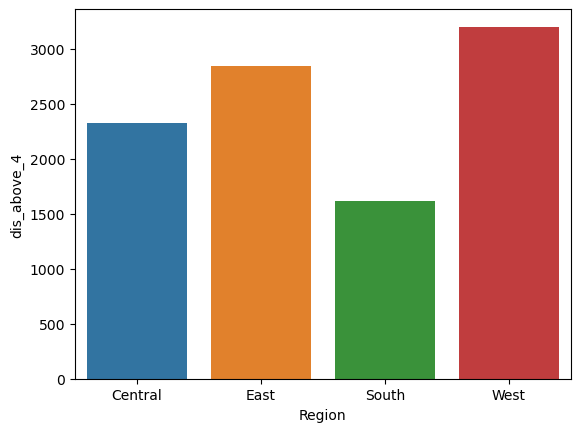

In [27]:
#relationship of region with discount
rel=data.groupby(['Region'],as_index=False)['dis_above_4'].count() #dis= discount
sns.barplot(x='Region',y='dis_above_4',data=rel)

<Axes: xlabel='Sales', ylabel='State'>

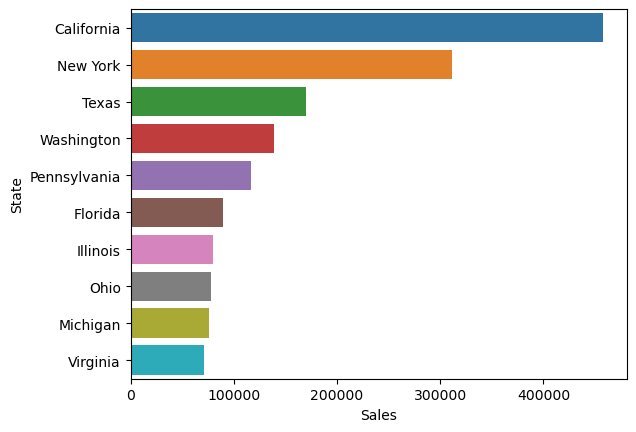

In [35]:
#first 10 states with the highest sales
sales=data.groupby(['State'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(10)
sns.barplot(x='Sales',y='State',data=sales)

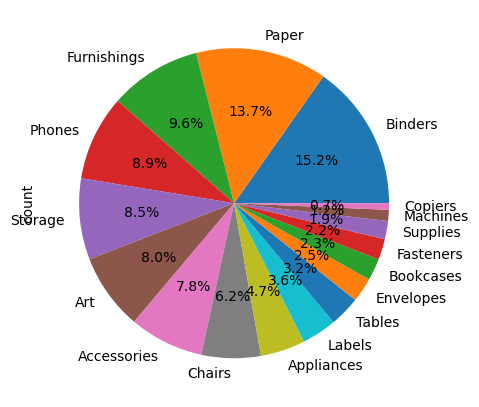

In [49]:
#pie chart on sub category
plt.figure(figsize=(5,6))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

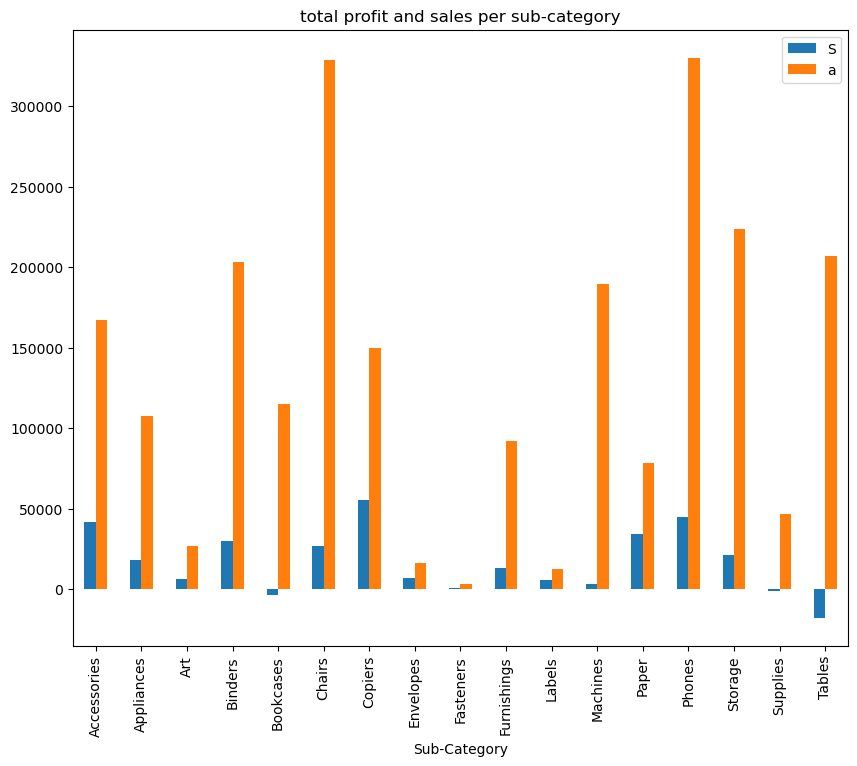

In [86]:
#Profit, Sales vs Sub-category
data.groupby(['Sub-Category'])[['Profit','Sales']].agg(['sum']).plot.bar()
plt.title("total profit and sales per sub-category")
plt.legend('Profit')
plt.legend('Sales')
plt.rcParams['figure.figsize']=[6,4]
plt.show()

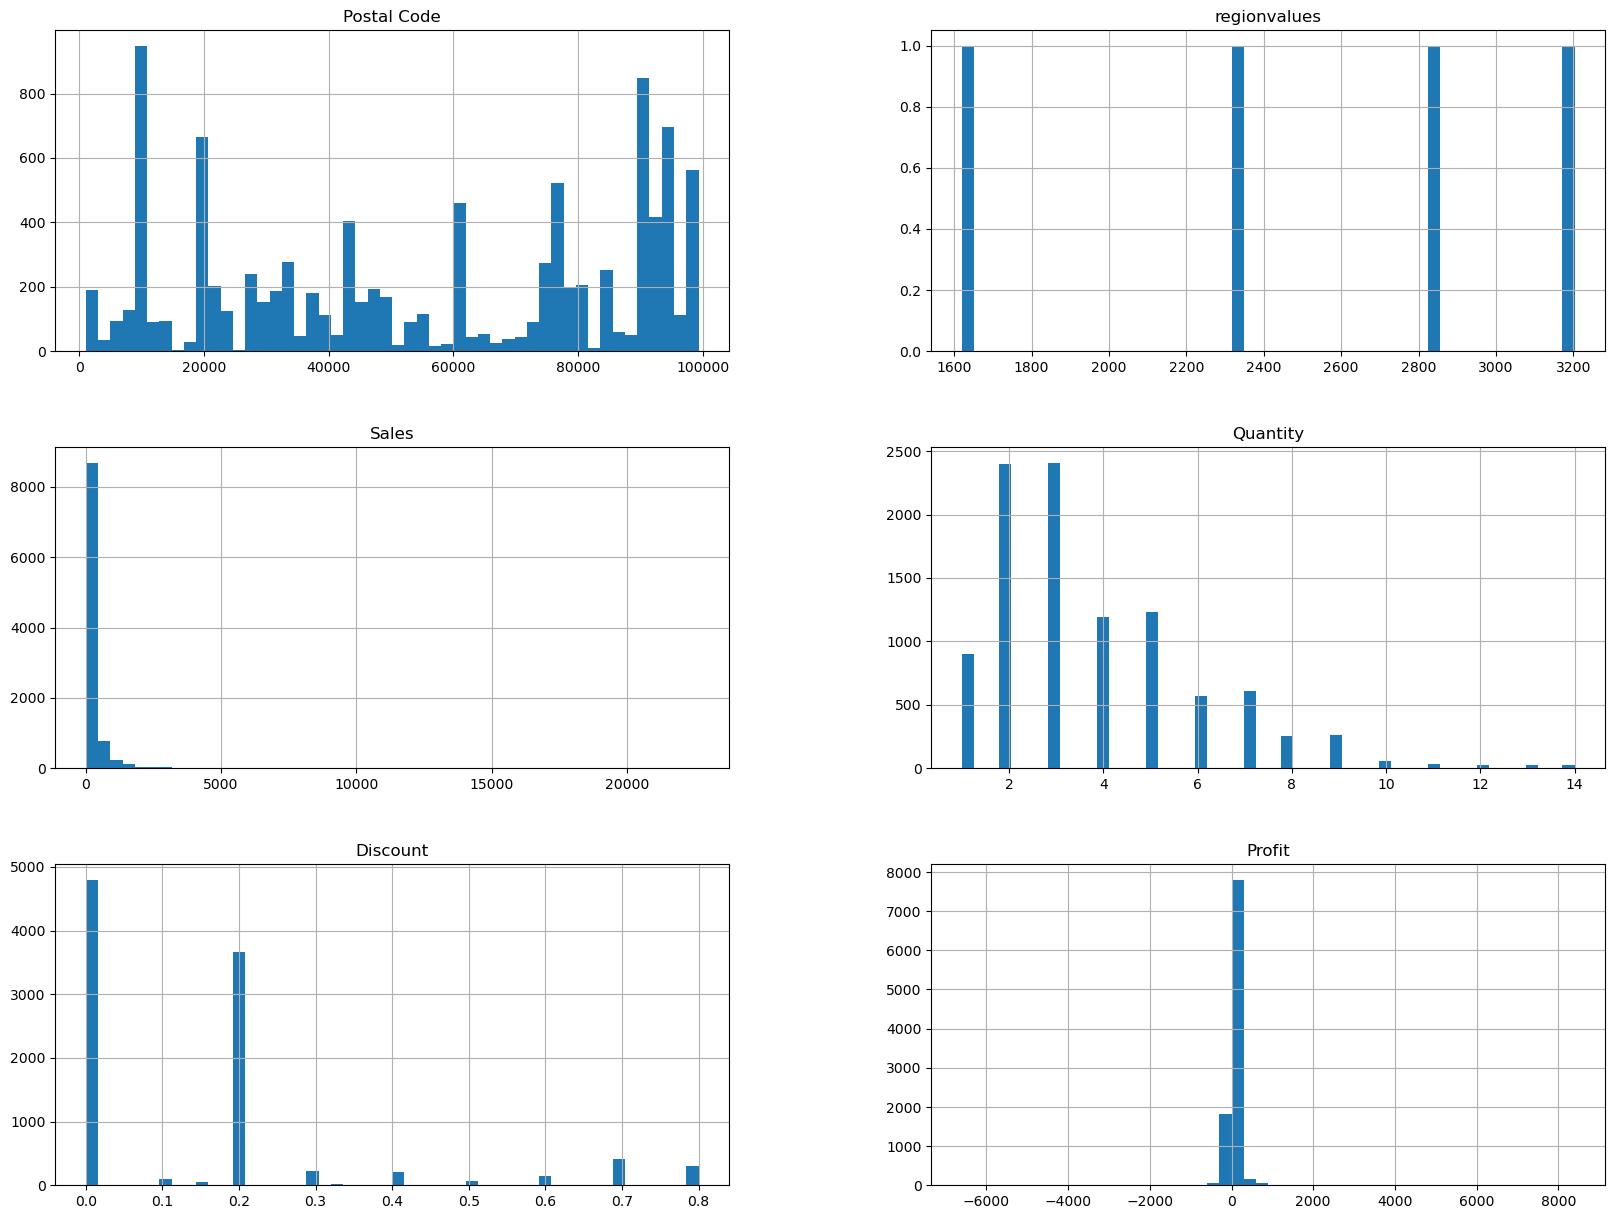

In [67]:
data.hist(bins=50,figsize=(20,15))
plt.show()

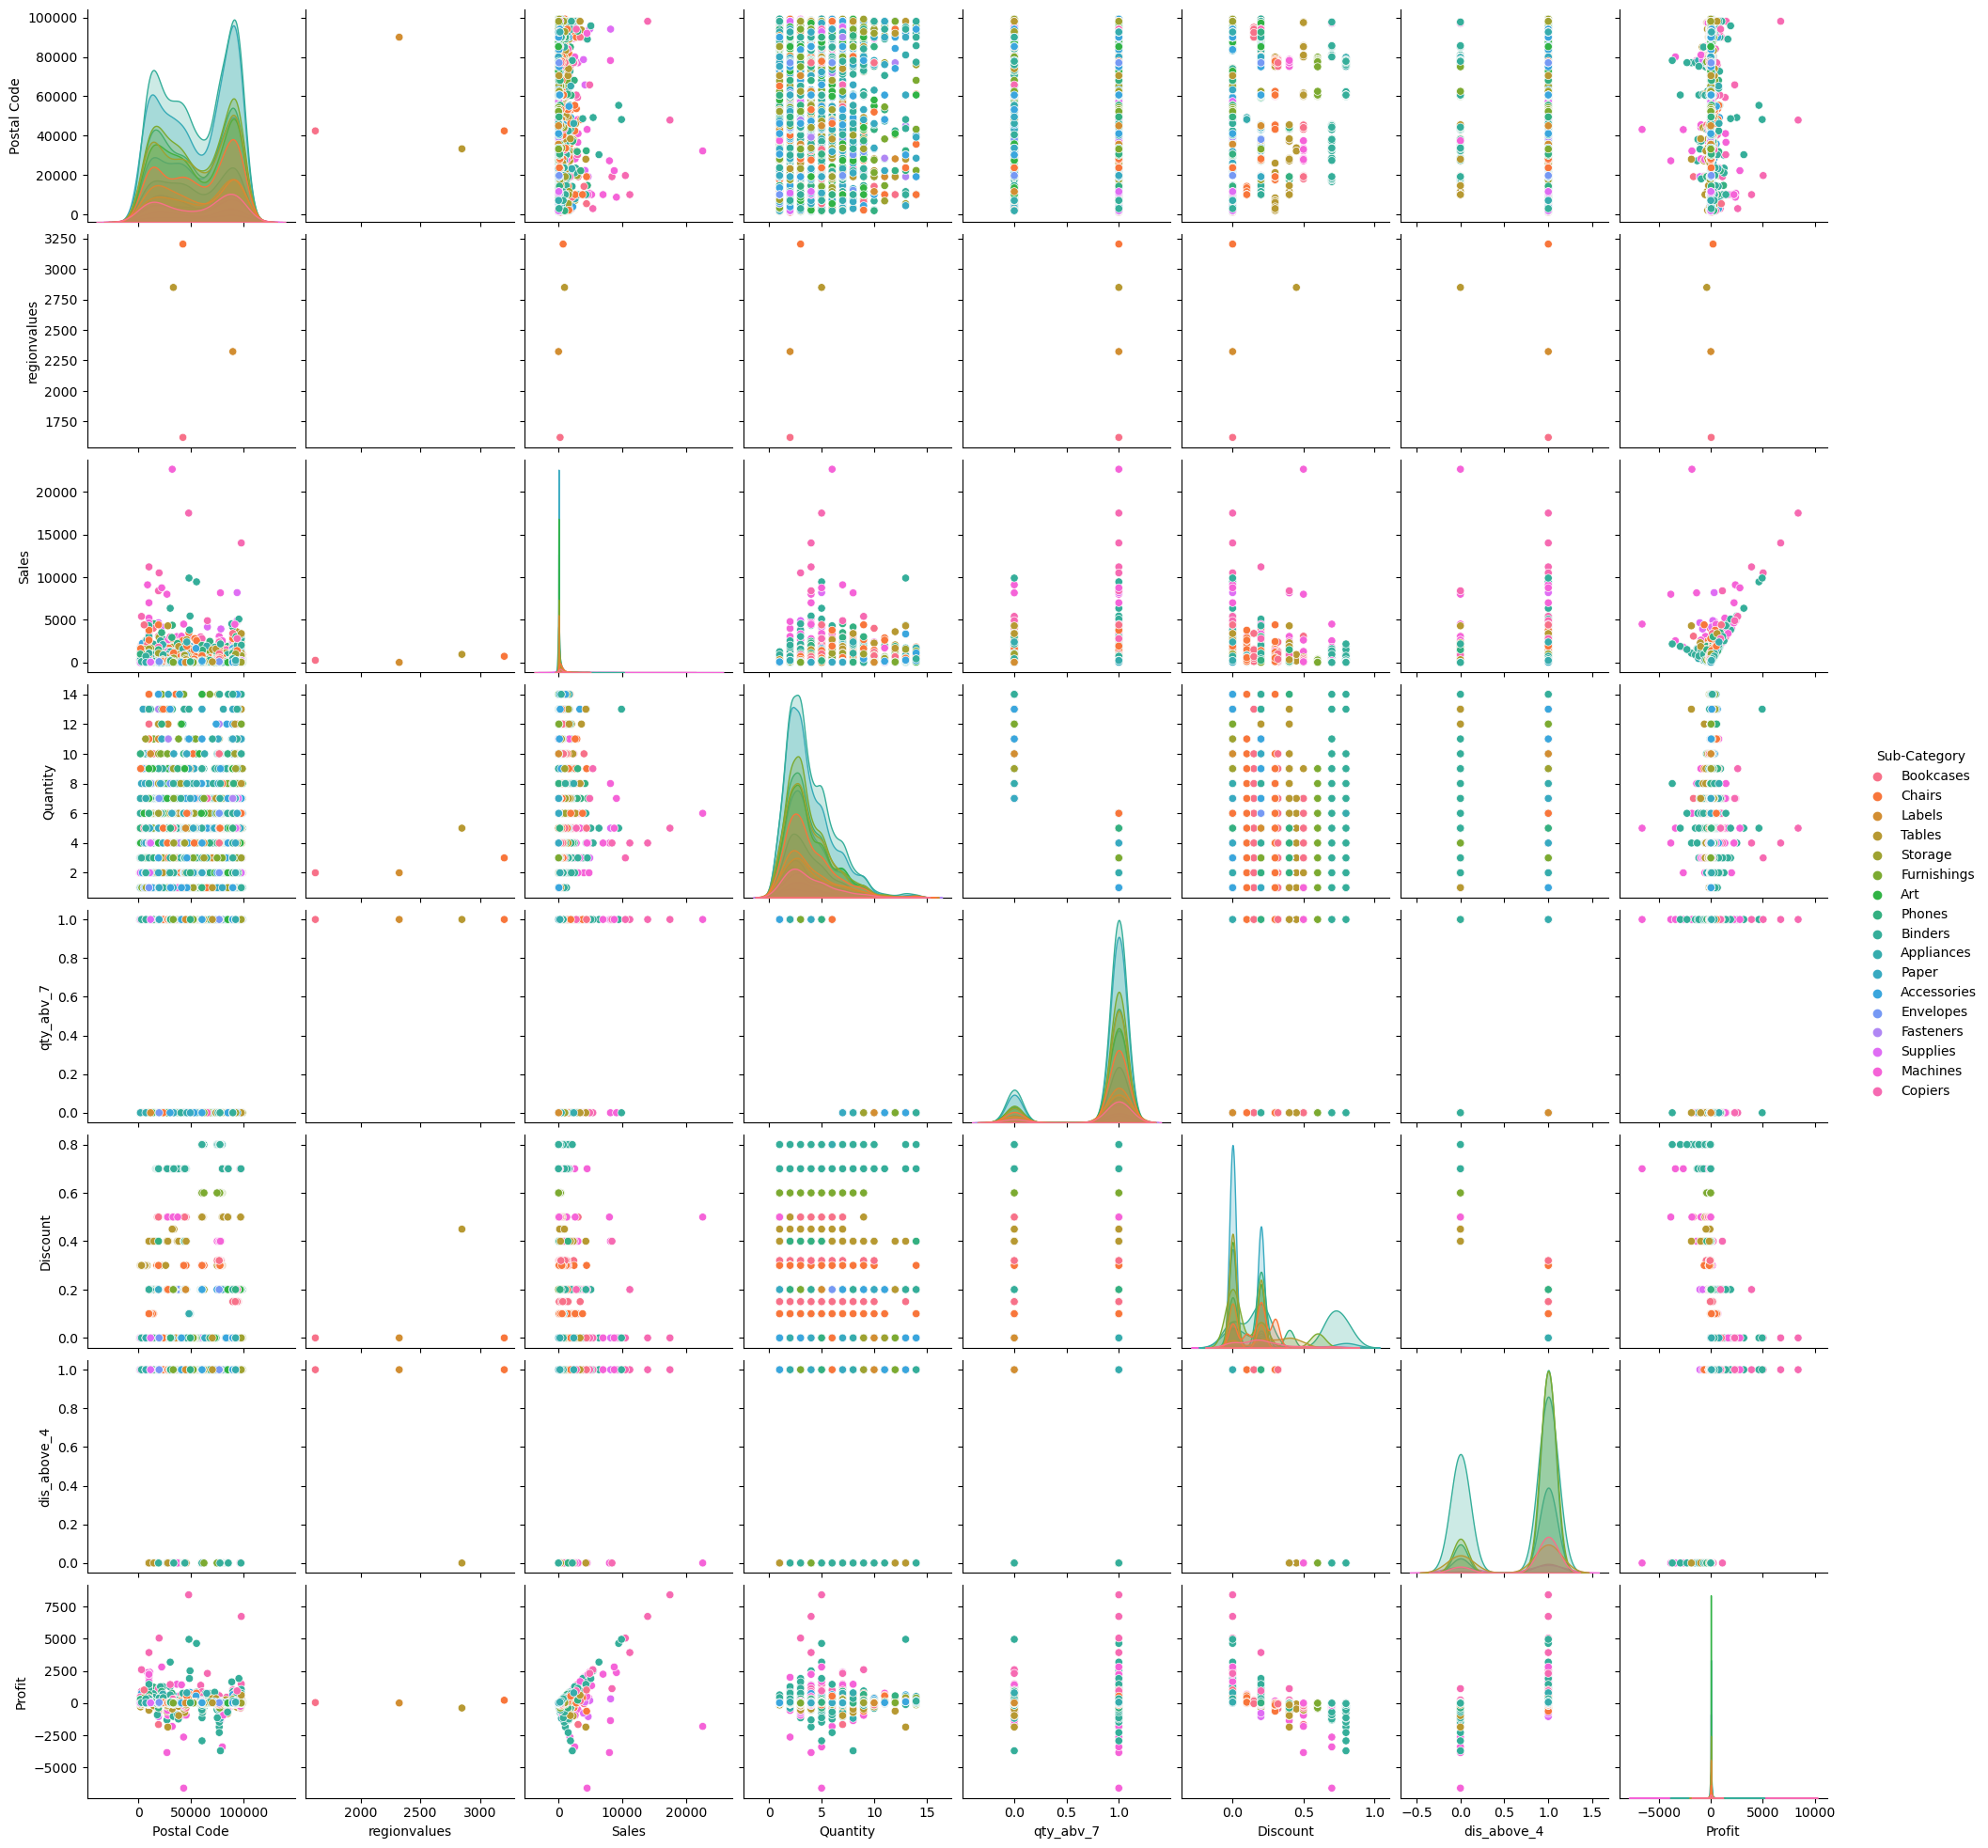

In [71]:
figsize=(15,10)
sns.pairplot(data,hue='Sub-Category')